# 🏘 House Price Prediction

## 1. Problem Defination
The goal for this project is to build a solution that is capable of predicting the house prices better than individuals.

## 2. Evaluation
The goal for this project would be to minimize the sum of mean squared error & improve our accuracy 

## 3. Features
The following properties can be considered helpful for predicting price of house:
 
* Total square feet area
* Number of bedrooms, bathrooms, stories etc
* Furnishing status

**`Basic amenities to be considered :`**
*  Air conditioning
*  Hot water heating
*  Parking 
*  Basement

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [2]:
df=pd.read_csv('Housing (1).csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
## find all the columns which contains strings
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)
        

mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus


In [5]:
df['price'].max()

13300000

In [6]:
df['price'].min()

1750000

In [7]:
df['price'].mean()

4766729.247706422

In [8]:
df['price'].median()

4340000.0

### Now we know that our mean and median of (Y) are very different.. That makes sense because it may contain outliers.......

## Let's Turn our object values to numerical value

In [9]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype("category").cat.as_ordered()

In [10]:
for label,  content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label+"_is_missing"] = pd.isnull(content)
        df[label] = pd.Categorical(content).codes

In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,mainroad_is_missing,guestroom_is_missing,basement_is_missing,hotwaterheating_is_missing,airconditioning_is_missing,prefarea_is_missing,furnishingstatus_is_missing
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,False,False,False,False,False,False,False
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,False,False,False,False,False,False,False
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,False,False,False,False,False,False,False
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,False,False,False,False,False,False,False
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,False,False,False,False,False,False,False


In [12]:
df.drop(df.columns[[13,14,15,16,17,18,19]], axis = 1, inplace = True)

In [13]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


## Let's Check Coorelation

In [14]:
df.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777,-0.304721
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779,-0.171445
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023,-0.123244
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472,-0.143559
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425,-0.104672
mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876,-0.156726
guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897,-0.118328
basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083,-0.112831
hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411,-0.031628
airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382,-0.150477


**Making correlation more visual**

In [16]:
X = df.drop('price',axis=1)
y = df[['price']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

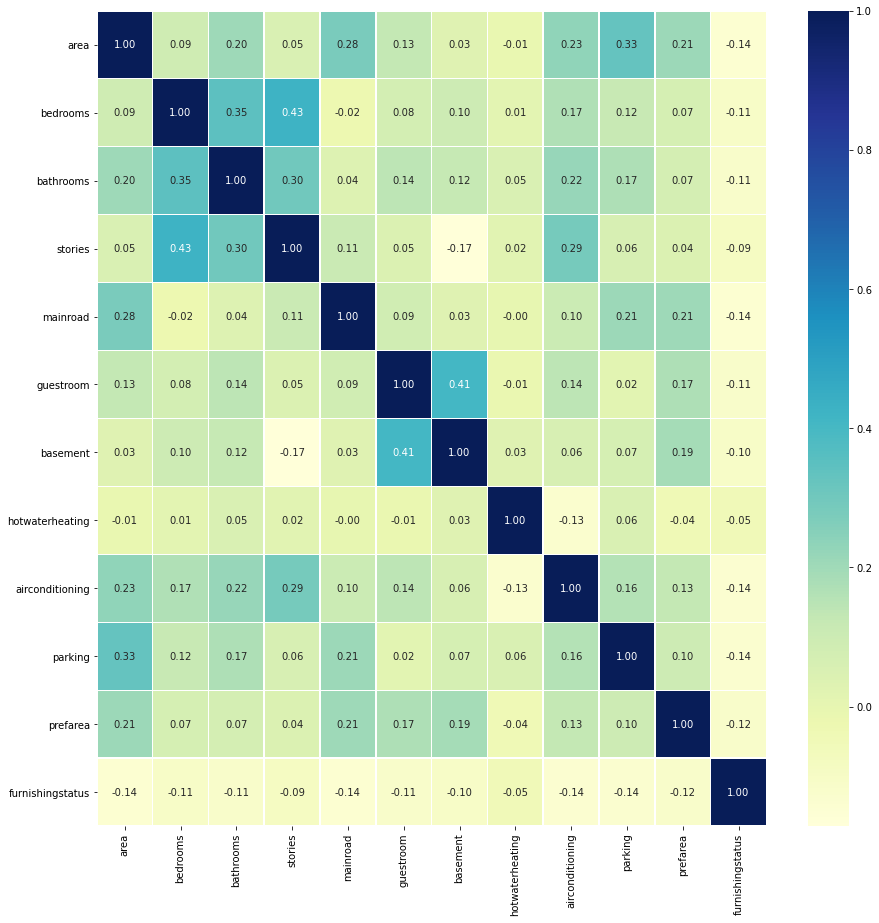

In [17]:
corr_mat = X_train.corr()
fig,ax = plt.subplots(figsize=[15,15])
ax=sns.heatmap(corr_mat,
               annot = True,
               linewidths = 0.5,
               fmt = (".2f"),
               cmap = "YlGnBu");

#### Let's try some modelling

In [18]:
np.random.seed(42)

X=df.drop('price',axis=1)
y=df[['price']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

lr=LinearRegression()

lr.fit(X_train,y_train)


LinearRegression()

In [19]:
lr.score(X_test,y_test)

0.6494754192267804

## 1. Let's Try Modelling

In [20]:
models={"LinearRegression":LinearRegression(),
        "RandomForestRegression":RandomForestRegressor(),
        "SupportVectorMachine":SVR(),
        "RidgeRegression":Ridge(),
        "LassoRegression":Lasso()}

# Create a function to detrmine the scores and fit the models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models : a dict of different Scikit learning machine learning models.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Setup random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    for name,model in models.items():
        #Fit the model into the data
        model.fit(X_train,y_train)
        
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    
    # Return the model scores
    return model_scores

In [21]:
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores   

<ipython-input-20-e83b9fed6414>:25: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


{'LinearRegression': 0.6494754192267804,
 'RandomForestRegression': 0.6115321143409216,
 'SupportVectorMachine': -0.10156389053848902,
 'RidgeRegression': 0.6489858025515296,
 'LassoRegression': 0.6494747129728069}

## Compare the baseline model's performances on the basis of `accuracy`

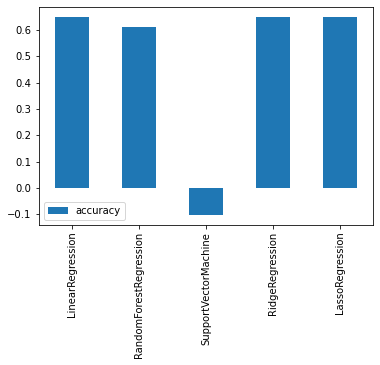

In [22]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"])
model_comparison.T.plot.bar();

## So here is the summary for various algorithms:

* Linear Regression and all other algorithm performed almost approximately the same on the data except `SUPPORTVECTORMACHINE`. 

* So we will not be continuing with SVM

* But the accuracy we wanted for making more accurate predictions AKA Our goal for the project is yet to be achieved.

## So Let's Try to handle the outliers for better accuracy

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
mainroad,545.0,8.587156e-01,3.486347e-01,0.0,1.0,1.0,1.0,1.0
guestroom,545.0,1.779817e-01,3.828487e-01,0.0,0.0,0.0,0.0,1.0
basement,545.0,3.504587e-01,4.775519e-01,0.0,0.0,0.0,1.0,1.0
hotwaterheating,545.0,4.587156e-02,2.093987e-01,0.0,0.0,0.0,0.0,1.0
airconditioning,545.0,3.155963e-01,4.651799e-01,0.0,0.0,0.0,1.0,1.0


### Let's make our outliers more visual of every column

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

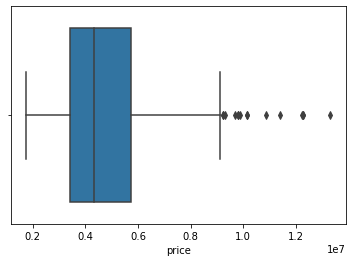

In [24]:
sns.boxplot(df['price'])

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


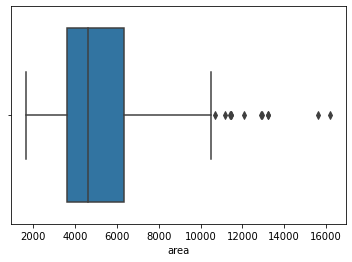

In [25]:
sns.boxplot(df['area']);

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


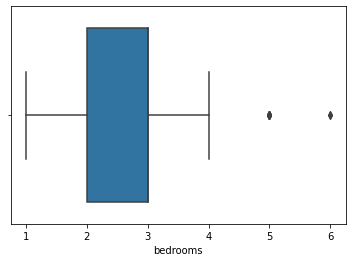

In [26]:
sns.boxplot(df['bedrooms']);

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


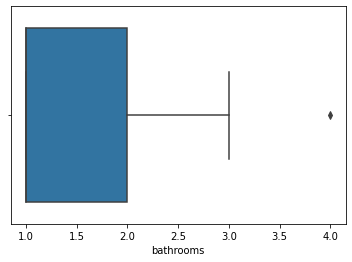

In [27]:
sns.boxplot(df['bathrooms']);

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


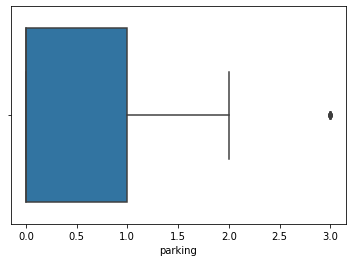

In [28]:
sns.boxplot(df['parking']);

### There are lots of outliers present in data so let's replace those outliers with our Q3

In [29]:
df['price_new'] = np.where(df['price']>=5740000.0,5740000.0,df['price'])

In [30]:
df['area_new'] = np.where(df['area']>=6360.0,6360.0,df['area'])

In [31]:
df['bedroom_new'] = np.where(df['bedrooms']>=3,3,df['bedrooms'])

In [32]:
df['bathroom_new'] = np.where(df['bathrooms']>=2,2,df['bathrooms'])

In [33]:
df['stories_new'] = np.where(df['stories']>=2,2,df['stories'])

In [34]:
df['parking_new'] = np.where(df['parking']>=1,1,df['parking'])

In [35]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
mainroad,545.0,8.587156e-01,3.486347e-01,0.0,1.0,1.0,1.0,1.0
guestroom,545.0,1.779817e-01,3.828487e-01,0.0,0.0,0.0,0.0,1.0
basement,545.0,3.504587e-01,4.775519e-01,0.0,0.0,0.0,1.0,1.0
hotwaterheating,545.0,4.587156e-02,2.093987e-01,0.0,0.0,0.0,0.0,1.0
airconditioning,545.0,3.155963e-01,4.651799e-01,0.0,0.0,0.0,1.0,1.0


In [36]:
df.drop(df.columns[[0,1,2,3,4,10]], axis = 1, inplace = True)

In [37]:
df.head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,price_new,area_new,bedroom_new,bathroom_new,stories_new,parking_new
0,1,0,0,0,1,1,0,5740000.0,6360.0,3,2,2,1
1,1,0,0,0,1,0,0,5740000.0,6360.0,3,2,2,1
2,1,0,1,0,0,1,1,5740000.0,6360.0,3,2,2,1
3,1,0,1,0,1,1,0,5740000.0,6360.0,3,2,2,1
4,1,1,1,0,1,0,0,5740000.0,6360.0,3,1,2,1


### Let's Make a Pairplot for better visualizing our columns

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning:

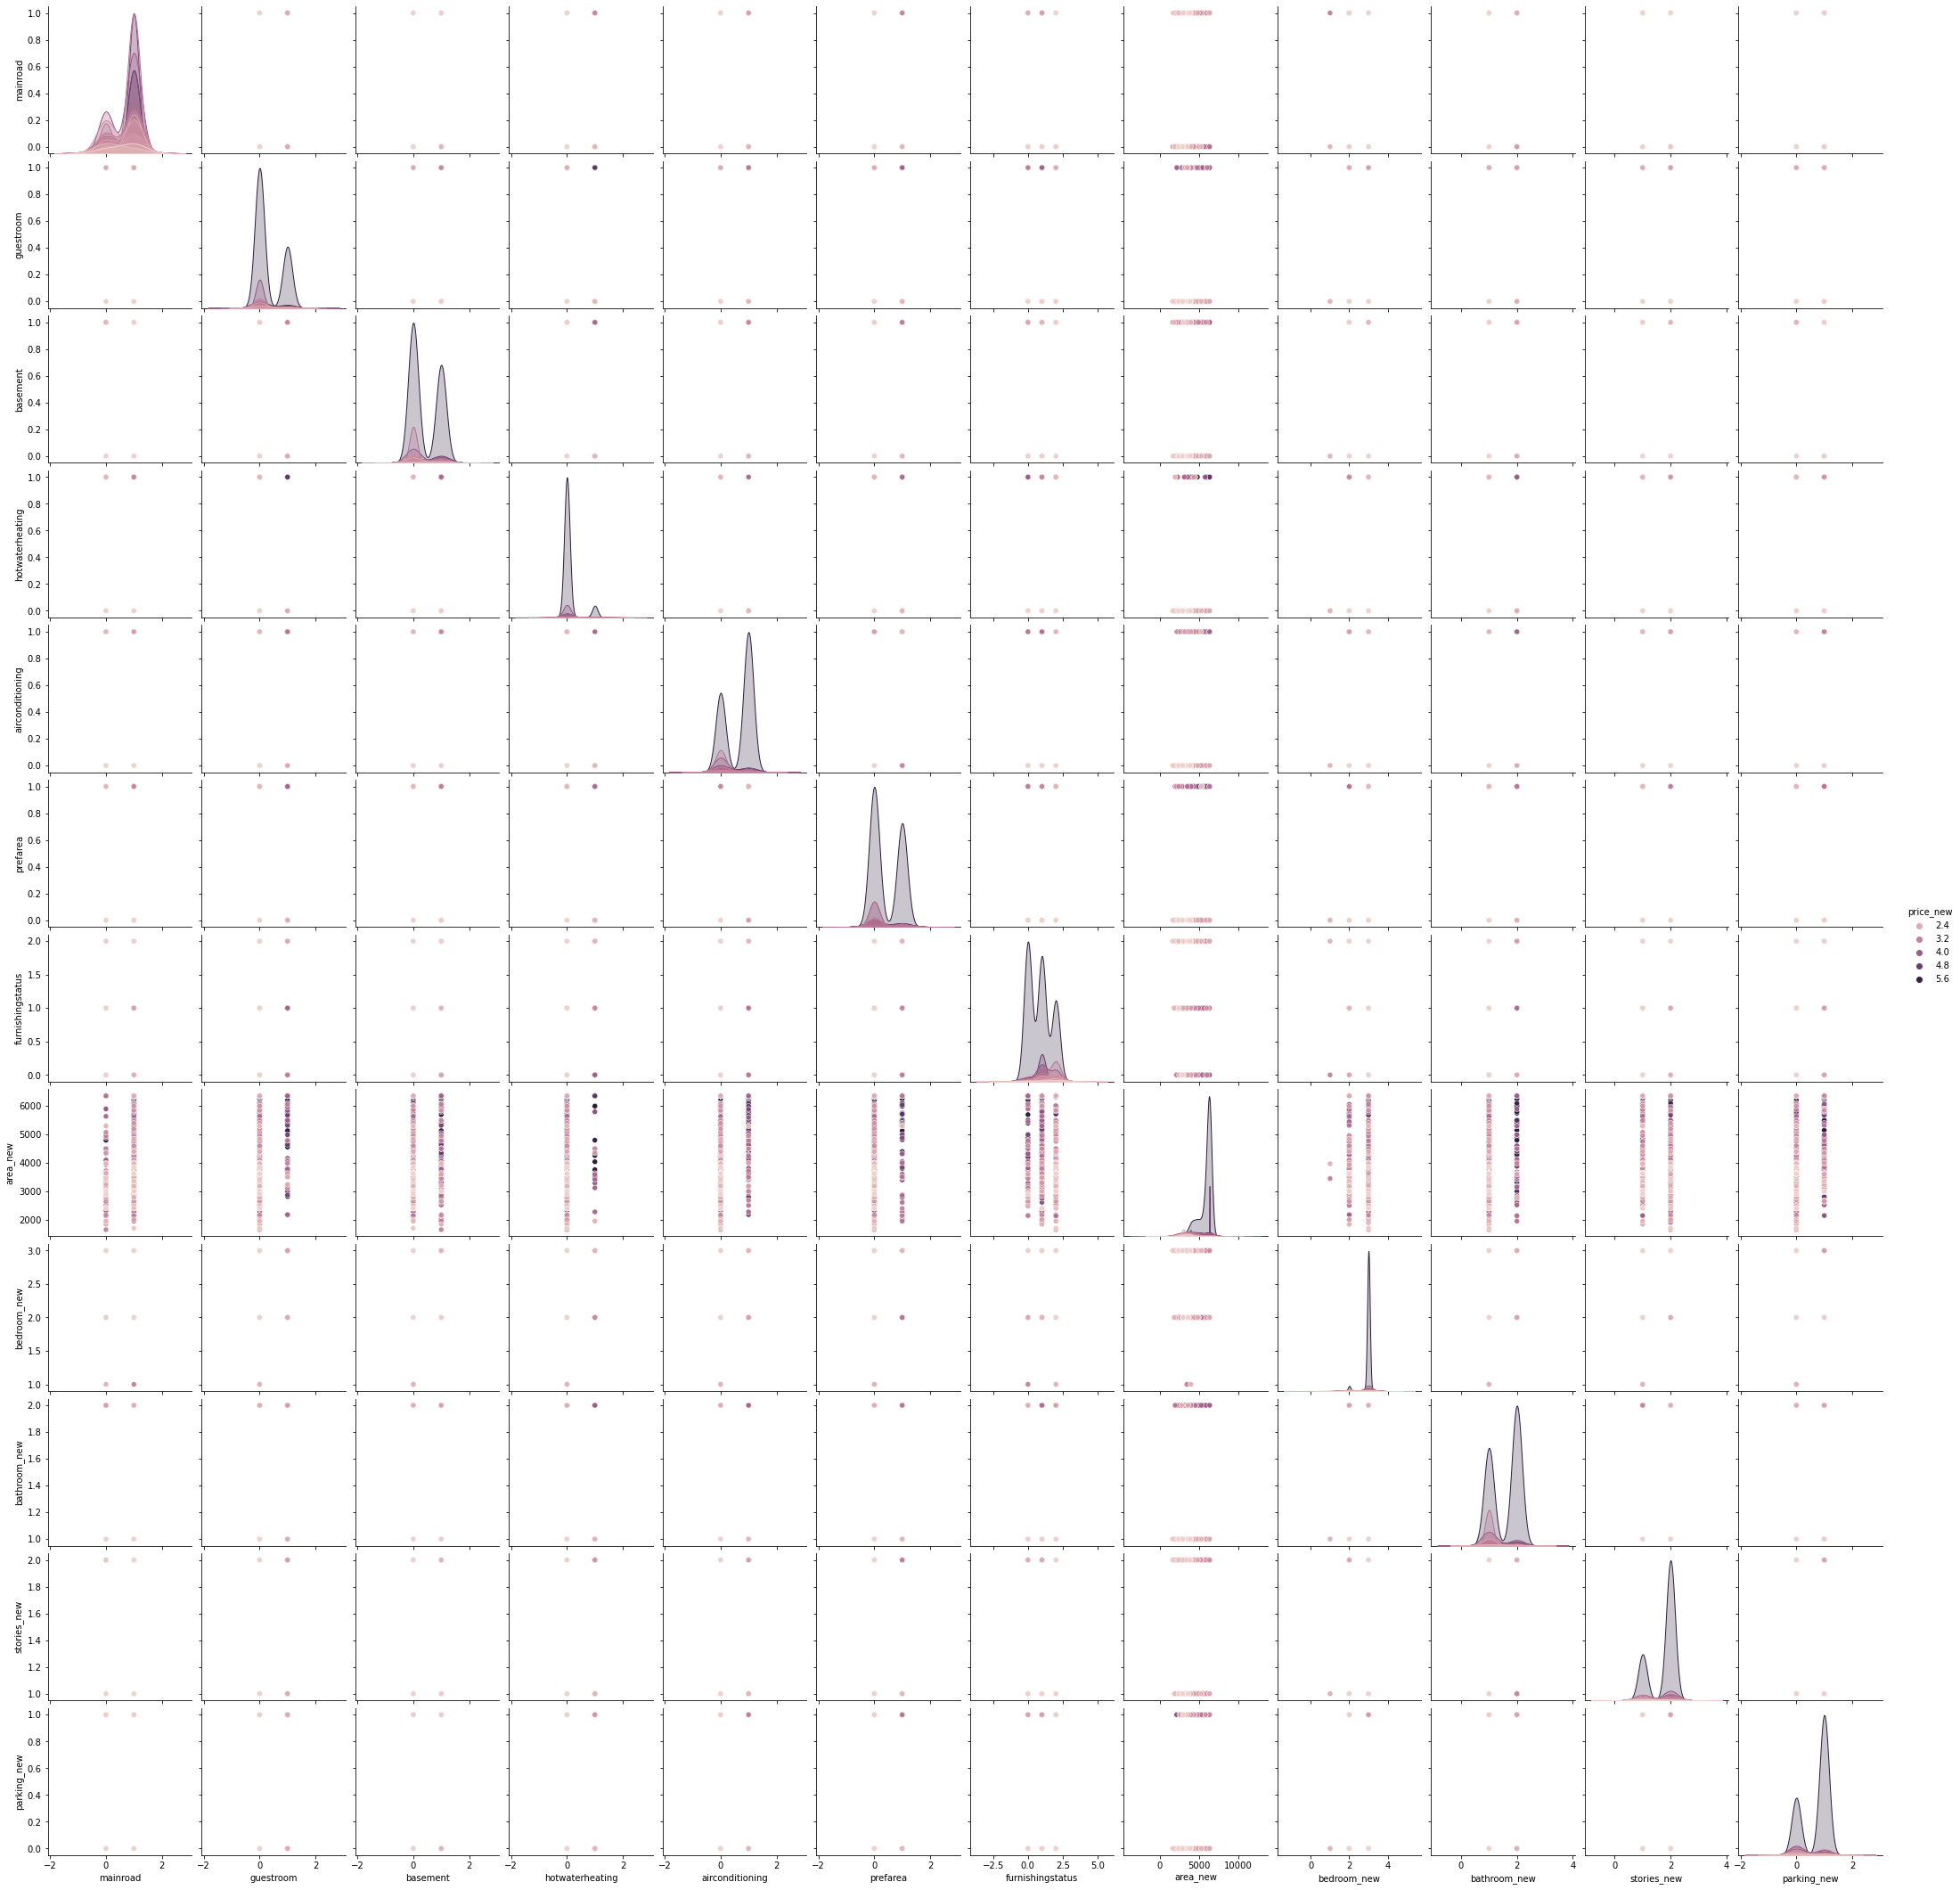

In [38]:
sns.pairplot(df,diag_kind="kde",hue='price_new')

## 2. Let's try Modelling 

In [39]:
models={"LinearRegression":LinearRegression(),
        "RandomForestRegression":RandomForestRegressor(),
       "RidgeRegression":Ridge(),
       "LassoRegression":Lasso()}

# Create a function to detrmine the scores and fit the models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models : a dict of different Scikit learning machine learning models.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Setup random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    for name,model in models.items():
        #Fit the model into the data
        model.fit(X_train,y_train)
        
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    
    # Return the model scores
    return model_scores

In [40]:
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores   

<ipython-input-39-f8ff1851a678>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


{'LinearRegression': 0.6494754192267804,
 'RandomForestRegression': 0.6115321143409216,
 'RidgeRegression': 0.6489858025515296,
 'LassoRegression': 0.6494747129728069}

In [41]:
# Create function to evaluate model on a few different levels:
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score
def show_scores(model):
    train_preds = lr.predict(X_train)
    val_preds = lr.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
             "Valid MAE": mean_absolute_error(y_valid, val_preds),
             "Training R^2": r2_score(y_train, train_preds),
             "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

In [42]:
np.random.seed(42)

# Shuffle the data
data_one = df.sample(frac=1)

# Split into X & Y
X = data_one.drop("price_new", axis=1)
y = data_one["price_new"]

# Split the data into train, validation and test sets
train_split = round(0.7 * len(data_one)) ## This contains our 70% of the data
valid_split = round(train_split +0.15 *len(data_one)) ## This contains our 15% of the data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# len(X_train), len(X_valid), len(X_test)

lr=LinearRegression()

lr.fit(X_train, y_train)

# Make baseline predictions
y_preds=lr.predict(X_valid)

# Evaluate the regressor on validation set
baseline_metrics = show_scores(lr)

baseline_metrics

{'Training MAE': 518402.9801421743,
 'Valid MAE': 511113.1130542359,
 'Training R^2': 0.6666849006891808,
 'Valid R^2': 0.6612069427703123}

# HyperParameter Optimization Using RandomizedSearchCV

## Hyperparameter Optimization for Ridge Regression


In [46]:
rf_grid_1 = {'alpha': [1.0],
 'copy_X': [True],
 'fit_intercept': [True],
 'max_iter': [None],
 'normalize': [False],
 'random_state': [None],
 'solver': ['auto'],
 'tol': [0.001]}

In [47]:
# Tune Ridge
np.random.seed(42)

# Setup random Hyperparameter search for Ridge
gs_ridge_reg = RandomizedSearchCV(Ridge(),
                                param_distributions=rf_grid_1,
                                cv=10,
                                verbose=True)

# Fit random Hyperparameter search model for Ridge
gs_ridge_reg.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomizedSearchCV(cv=10, estimator=Ridge(),
                   param_distributions={'alpha': [1.0], 'copy_X': [True],
                                        'fit_intercept': [True],
                                        'max_iter': [None],
                                        'normalize': [False],
                                        'random_state': [None],
                                        'solver': ['auto'], 'tol': [0.001]},
                   verbose=True)

In [48]:
gs_ridge_reg.score(X_test,y_test)

0.6379270503894848

## Hyperparameter Optimization for RandomForestRegressor


In [49]:
rf_grid = {'warm_start': [False],
 'verbose': [0],
 'random_state':[None],
 'oob_score': [False],
 'n_jobs': [None],
 'n_estimators': [10],
 'min_weight_fraction_leaf': [0.0],
 'min_samples_split': [14],
 'min_samples_leaf': [3],
 'min_impurity_split': [None],
 'min_impurity_decrease': [0.0],
 'max_samples': [None],
 'max_leaf_nodes': [None],
 'max_features': ['auto'],
 'max_depth': [10],
 'criterion': ['mse'],
 'ccp_alpha': [0.0],
 'bootstrap': [True]}

In [50]:
# Tune RandomForestRegressor
np.random.seed(42)

# Setup random Hyperparameter search for RandomForestRegressor
gs_rfr_reg = RandomizedSearchCV(RandomForestRegressor(),
                                param_distributions=rf_grid,
                                cv=5,
                                n_iter=50,
                                verbose=True)

# Fit random Hyperparameter search model for RandomForestRegressor
gs_rfr_reg.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'bootstrap': [True], 'ccp_alpha': [0.0],
                                        'criterion': ['mse'], 'max_depth': [10],
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': [None],
                                        'max_samples': [None],
                                        'min_impurity_decrease': [0.0],
                                        'min_impurity_split': [None],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [14],
                                        'min_weight_fraction_leaf': [0.0],
                                        'n_estimators': [10], 'n_jobs': [None],
                                        'oob_score': [False],
                                        'random_state': [None], 'verbose': [0],
 

In [51]:
gs_rfr_reg.score(X_test,y_test)

0.6301385417143561

## Let's fetch best hyper parameters for Linear Regression

In [52]:
lr=LinearRegression()

In [53]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [54]:
lr_grid = {'copy_X': [True], 'fit_intercept': [True], 'n_jobs': [None], 'normalize': [True]}

In [55]:
# Tune Linear Regression
np.random.seed(42)

# Setup random Hyperparameter search for LinearRegression
gs_rfr_reg = RandomizedSearchCV(LinearRegression(),
                                param_distributions=lr_grid,
                                cv=6,
                                n_iter=20,
                                verbose=True)

# Fit random Hyperparameter search model for Linear Regression
gs_rfr_reg.fit(X_train, y_train)

Fitting 6 folds for each of 1 candidates, totalling 6 fits


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s finished


RandomizedSearchCV(cv=6, estimator=LinearRegression(), n_iter=20,
                   param_distributions={'copy_X': [True],
                                        'fit_intercept': [True],
                                        'n_jobs': [None], 'normalize': [True]},
                   verbose=True)

In [56]:
gs_rfr_reg.score(X_test,y_test)

0.6362163774868967

## So Here's The Summary of HyperParameter Optimization So Far:

* Our Algorithms have performed poorly so far.

* So in order to get the accuracy we now have to somehow make our procedure of working better.

 **Till now we were somehow dealing with the outliers. But now we will delete those rows which cross a threshold set by us so that we could experiment a bit and get our desired accuracy.And append all new rows in a new dataframe**

## Let's Delete Outliers 

In [57]:
from scipy import stats

z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

print(new_df)

     mainroad  guestroom  basement  hotwaterheating  airconditioning  \
0           1          0         0                0                1   
1           1          0         0                0                1   
2           1          0         1                0                0   
3           1          0         1                0                1   
4           1          1         1                0                1   
..        ...        ...       ...              ...              ...   
540         1          0         1                0                0   
541         0          0         0                0                0   
542         1          0         0                0                0   
543         0          0         0                0                0   
544         1          0         0                0                0   

     prefarea  furnishingstatus  price_new  area_new  bedroom_new  \
0           1                 0  5740000.0    6360.0            3 

In [58]:
np.random.seed(42)

X=new_df.drop('price_new',axis=1)
y=new_df[['price_new']]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

rfr=RandomForestRegressor()

rfr.fit(X_train,y_train)


<ipython-input-58-612016906252>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train,y_train)


RandomForestRegressor()

In [59]:
rfr.score(X_test,y_test)

0.6869530800063677

## New Dataframe Summary

i) **Basically we have deleted some of rows that were having a large number AKA Outliers. And our new dataframe is made excluding those outlers**

ii) **So we have also seen that our performance of RandomForestRegressor has also been affected and now modelling problem seems to be a bit more clear**

iii) **Let's continue this and try some modelling**

## 3. Let's Try Modelling

In [60]:
models={"LinearRegression":LinearRegression(),
        "RandomForestRegression":RandomForestRegressor(),
       "RidgeRegression":Ridge(),
       "LassoRegression":Lasso()}

# Create a function to detrmine the scores and fit the models.
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models
    models : a dict of different Scikit learning machine learning models.
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Setup random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    
    for name,model in models.items():
        #Fit the model into the data
        model.fit(X_train,y_train)
        
        # Evaluate the model and append its scores to model_scores
        model_scores[name] = model.score(X_test,y_test)
    
    # Return the model scores
    return model_scores

In [61]:
model_scores = fit_and_score(models=models,
                             X_train = X_train,
                             X_test = X_test,
                             y_train = y_train,
                             y_test = y_test)
model_scores   

<ipython-input-60-f8ff1851a678>:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,y_train)


{'LinearRegression': 0.7088068474779763,
 'RandomForestRegression': 0.6890261857783895,
 'RidgeRegression': 0.7092409574924503,
 'LassoRegression': 0.708806926999624}

# HyperParameters Using RandomizedSearchCV

### Let's fetch best hyper parameters for RandomForestRegressor

In [62]:
X=new_df.drop("price_new",axis=1)
y=new_df[["price_new"]]

In [63]:
rf_grid = {'warm_start': [False],
 'verbose': [0],
 'random_state':[None],
 'oob_score': [False],
 'n_jobs': [None],
 'n_estimators': [10],
 'min_weight_fraction_leaf': [0.0],
 'min_samples_split': [14],
 'min_samples_leaf': [3],
 'min_impurity_split': [None],
 'min_impurity_decrease': [0.0],
 'max_samples': [None],
 'max_leaf_nodes': [None],
 'max_features': ['auto'],
 'max_depth': [10],
 'criterion': ['mse'],
 'ccp_alpha': [0.0],
 'bootstrap': [True]}

In [64]:
# Tune RandomForestRegressor
np.random.seed(42)

# Setup random Hyperparameter search for RandomForestRegressor
gs_rfr_reg = RandomizedSearchCV(RandomForestRegressor(),
                                param_distributions=rf_grid,
                                cv=7,
                                n_iter=50,
                                verbose=True)

# Fit random Hyperparameter search model for RandomForestRegressor
gs_rfr_reg.fit(X_train, y_train)

Fitting 7 folds for each of 1 candidates, totalling 7 fits


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selec

RandomizedSearchCV(cv=7, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'bootstrap': [True], 'ccp_alpha': [0.0],
                                        'criterion': ['mse'], 'max_depth': [10],
                                        'max_features': ['auto'],
                                        'max_leaf_nodes': [None],
                                        'max_samples': [None],
                                        'min_impurity_decrease': [0.0],
                                        'min_impurity_split': [None],
                                        'min_samples_leaf': [3],
                                        'min_samples_split': [14],
                                        'min_weight_fraction_leaf': [0.0],
                                        'n_estimators': [10], 'n_jobs': [None],
                                        'oob_score': [False],
                                        'random_state': [None], 'verbose': [0],
 

In [65]:
gs_rfr_reg.score(X_test,y_test)

0.7206095889508397

## Let's fetch best hyper parameters for Ridge

In [66]:
rf_grid_1 = {'alpha': [1.0],
 'copy_X': [True],
 'fit_intercept': [True],
 'max_iter': [None],
 'normalize': [False],
 'random_state': [None],
 'solver': ['auto'],
 'tol': [0.001]}

In [67]:
# Tune Logistic Ridge
np.random.seed(42)

# Setup random Hyperparameter search for Ridge
gs_log_reg = RandomizedSearchCV(Ridge(),
                                param_distributions=rf_grid_1,
                                cv=10,
                                verbose=True)

# Fit random Hyperparameter search model for Ridge
gs_log_reg.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


RandomizedSearchCV(cv=10, estimator=Ridge(),
                   param_distributions={'alpha': [1.0], 'copy_X': [True],
                                        'fit_intercept': [True],
                                        'max_iter': [None],
                                        'normalize': [False],
                                        'random_state': [None],
                                        'solver': ['auto'], 'tol': [0.001]},
                   verbose=True)

In [68]:
gs_log_reg.score(X_test,y_test)

0.7092409574924503

## Let's fetch best hyper parameters for Linear Regression

In [69]:
lin_hyper = {'copy_X': [True], 'fit_intercept': [True], 'n_jobs': [None], 'normalize': [False]}

In [70]:
# Tune LinearRegression
np.random.seed(42)

# Setup random Hyperparameter search for LinearRegression
gs_log_reg = RandomizedSearchCV(LinearRegression(),
                                param_distributions=lin_hyper,
                                cv=20,
                                n_iter=50,
                                verbose=True)

# Fit random Hyperparameter search model for LinearRegression
gs_log_reg.fit(X_train, y_train)

Fitting 20 folds for each of 1 candidates, totalling 20 fits


/Users/mac/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:278: UserWarning: The total space of parameters 1 is smaller than n_iter=50. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished


RandomizedSearchCV(cv=20, estimator=LinearRegression(), n_iter=50,
                   param_distributions={'copy_X': [True],
                                        'fit_intercept': [True],
                                        'n_jobs': [None],
                                        'normalize': [False]},
                   verbose=True)

In [71]:
gs_log_reg.score(X_test,y_test)

0.7088068474779763

                                                **************

In [76]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mainroad,518.0,8.610039e-01,3.462769e-01,0.0,1.0,1.0,1.0,1.0
guestroom,518.0,1.795367e-01,3.841721e-01,0.0,0.0,0.0,0.0,1.0
basement,518.0,3.513514e-01,4.778540e-01,0.0,0.0,0.0,1.0,1.0
hotwaterheating,518.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
airconditioning,518.0,3.301158e-01,4.707092e-01,0.0,0.0,0.0,1.0,1.0
prefarea,518.0,2.413127e-01,4.282932e-01,0.0,0.0,0.0,0.0,1.0
furnishingstatus,518.0,1.075290e+00,7.643706e-01,0.0,0.0,1.0,2.0,2.0
price_new,518.0,4.348601e+06,1.139522e+06,1750000.0,3430000.0,4340000.0,5718125.0,5740000.0
area_new,518.0,4.728988e+03,1.373234e+03,1650.0,3600.0,4600.0,6360.0,6360.0
bedroom_new,518.0,2.747104e+00,4.350919e-01,2.0,2.0,3.0,3.0,3.0


In [81]:
data={'mainroad':1,'guestroom':1,'basement':1,'hotwaterheating':0,'airconditioning':1,'prefarea':1,'furnishingstatus':2,'bedroom_new':3,'area_new':6360,'bathroom_new':2,'stories_new':2,'parking_new':1}

index=[1]

new_cust=pd.DataFrame(data,index)

In [88]:
prediction_new_cust=gs_rfr_reg.predict(new_cust)

print("The house cost for new customer is", prediction_new_cust)

The house cost for new customer is [4376394.00641026]
